# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [4]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        #date = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        #date.append(date)
    
        print(f"City Name: {city}, Longitude: {lng}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: kapaa, Longitude: -159.319
City Name: ushuaia, Longitude: -68.3
City Name: grand gaube, Longitude: 57.6608
City Name: chuy, Longitude: -53.4616
City Name: savannah bight, Longitude: -85.85
City Name: bethel, Longitude: -73.414
City Name: longyearbyen, Longitude: 15.6401
City Name: constitucion, Longitude: -72.4167
City Name: port alfred, Longitude: 26.891
City Name: hithadhoo, Longitude: 73.0833
City Name: clyde river, Longitude: -68.5914
City Name: esperance, Longitude: 121.9
City Name: georgetown, Longitude: 100.3354
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: maues, Longitude: -57.7186
That record does not exist, searching for next record...
City Name: olafsvik, Longitude: -23.7142
City Name: hilo, Longitude: -155.09
City Name: itarema, Longitude: -39.9167
City Name: port lincoln, Longitude: 135.8667
City Name: jamestown, Longitude: -79.2353
City Name: ostrovnoy, Longitude: 39.5131
City Name:

City Name: chimore, Longitude: -65.1333
City Name: majene, Longitude: 118.9707
City Name: matsumoto, Longitude: 137.9667
City Name: torbay, Longitude: -52.7314
City Name: coahuayana, Longitude: -103.6833
City Name: oussouye, Longitude: -16.5469
City Name: lasa, Longitude: 10.7002
City Name: tiksi, Longitude: 128.8694
City Name: chester, Longitude: -75.8749
City Name: ilulissat, Longitude: -51.1
City Name: thinadhoo, Longitude: 72.9333
City Name: vostok, Longitude: 135.8833
City Name: mugumu, Longitude: 34.7
City Name: chokurdakh, Longitude: 147.9167
City Name: tanabe, Longitude: 135.3667
That record does not exist, searching for next record...
City Name: chunoyar, Longitude: 97.3217
That record does not exist, searching for next record...
City Name: anshun, Longitude: 105.9333
City Name: bosaso, Longitude: 49.1816
City Name: yerbogachen, Longitude: 108.0108
City Name: okha, Longitude: 142.9478
That record does not exist, searching for next record...
City Name: stornoway, Longitude: -6.

City Name: kirakira, Longitude: 161.9205
City Name: porto novo, Longitude: 2.6036
City Name: awjilah, Longitude: 21.2869
City Name: baltay, Longitude: 46.6308
City Name: sao jose de piranhas, Longitude: -38.5019
City Name: salalah, Longitude: 54.0924
City Name: yulara, Longitude: 130.9889
City Name: lagoa, Longitude: -27.9833
City Name: ketchikan, Longitude: -131.6461
City Name: moindou, Longitude: 165.677
City Name: jalu, Longitude: 21.5482
That record does not exist, searching for next record...
City Name: hobyo, Longitude: 48.5268
That record does not exist, searching for next record...
City Name: mitsamiouli, Longitude: 43.2844
City Name: mangai, Longitude: 19.5333
That record does not exist, searching for next record...
City Name: pirgos, Longitude: 25.7178
City Name: batagay, Longitude: 134.6333
City Name: chingola, Longitude: 27.8838
City Name: longhua, Longitude: 114.1919
City Name: beaverlodge, Longitude: -119.4361
City Name: regen, Longitude: 13.1333
City Name: suzun, Longitu

City Name: mahanoro, Longitude: 48.8
City Name: hohhot, Longitude: 111.6522
City Name: acajutla, Longitude: -89.8275
City Name: cape coast, Longitude: -1.2466
City Name: kaeo, Longitude: 173.7833
City Name: padang, Longitude: 100.3543
City Name: ban dung, Longitude: 103.2596
City Name: havelock, Longitude: -76.9013
City Name: capao bonito, Longitude: -48.3494
City Name: ypsonas, Longitude: 32.9574
City Name: inhambane, Longitude: 35.3833
City Name: salinopolis, Longitude: -47.3561
City Name: byron bay, Longitude: 153.6167
City Name: tazovskiy, Longitude: 78.7
City Name: bugasong, Longitude: 122.0659
City Name: lukovetskiy, Longitude: 41.9211
City Name: nabire, Longitude: 135.4833
City Name: ancud, Longitude: -73.8203
City Name: vao, Longitude: 167.4833
City Name: nishihara, Longitude: 127.7558
City Name: ayan, Longitude: 138.1667
City Name: oktyabrskoye, Longitude: 44.7417
City Name: ayorou, Longitude: 0.9174
City Name: domoni, Longitude: 44.5319
City Name: amurzet, Longitude: 131.0981

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5848280,Kapaa,US,22.0752,-159.3190,76.05,61,75,13.80
1,3833367,Ushuaia,AR,-54.8000,-68.3000,41.00,60,75,3.44
2,934479,Grand Gaube,MU,-20.0064,57.6608,73.00,91,20,11.01
3,3443061,Chui,UY,-33.6971,-53.4616,57.42,76,0,2.84
4,3601402,Savannah Bight,HN,16.4500,-85.8500,86.68,58,40,11.50


In [7]:
cities_df.describe()

,City ID,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
count,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,2.713698e+06,19.032549,18.890183,61.494549,71.623264,53.833333,7.119306
std,1.714257e+06,33.230777,90.849759,17.898770,21.367560,38.039156,4.880828
min,5.700000e+04,-54.800000,-175.200000,-1.430000,7.000000,0.000000,0.380000
25%,1.507576e+06,-9.192275,-61.911100,48.200000,63.000000,17.000000,3.440000
50%,2.200486e+06,22.933350,25.750550,64.805000,77.000000,65.000000,5.960000
75%,3.663090e+06,46.498925,101.465675,76.782500,87.000000,90.000000,9.220000
max,1.072286e+07,78.218600,179.316700,94.620000,100.000000,100.000000,31.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
humidity = cities_df.loc[(
    cities_df["Humidity"] >100)]

humidity.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed


In [25]:
#  Get the indices of cities that have humidity over 100%.
humidity.index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [27]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
# First drop the NaN values
weather_data_values = cities_df.dropna()

# Reset the index (it will have gaps in it where the NaN value rows have been deleted)
weather_data_values = weather_data_values.reset_index(drop=True)

# Change the datatype for the city_id field to an integer (it gets created as a float)
weather_data_values['City ID'] = weather_data_values['City ID'].astype(int)
#weather_data_values.head()
weather_data_values.head()


,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5848280,Kapaa,US,22.0752,-159.3190,76.05,61,75,13.80
1,3833367,Ushuaia,AR,-54.8000,-68.3000,41.00,60,75,3.44
2,934479,Grand Gaube,MU,-20.0064,57.6608,73.00,91,20,11.01
3,3443061,Chui,UY,-33.6971,-53.4616,57.42,76,0,2.84
4,3601402,Savannah Bight,HN,16.4500,-85.8500,86.68,58,40,11.50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

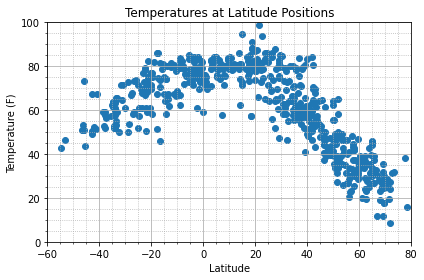

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

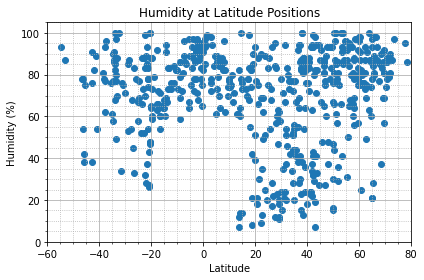

In [19]:

x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

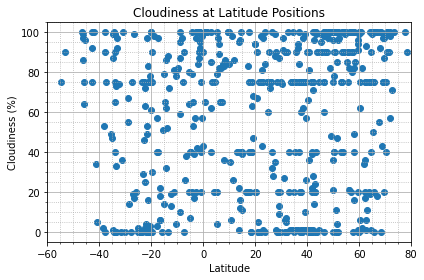

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

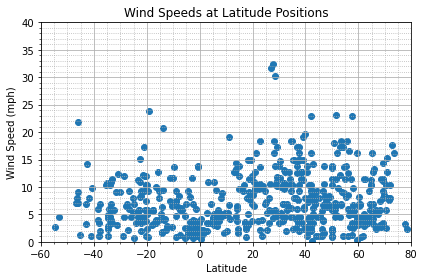

In [22]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()

## Linear Regression

In [24]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

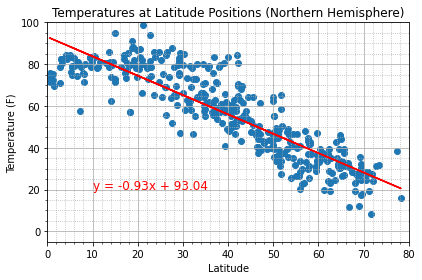

In [31]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

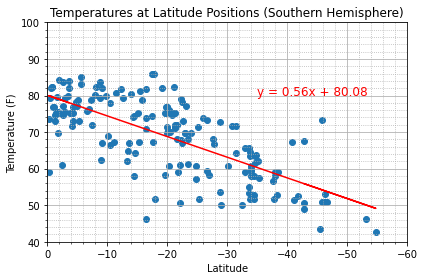

In [32]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

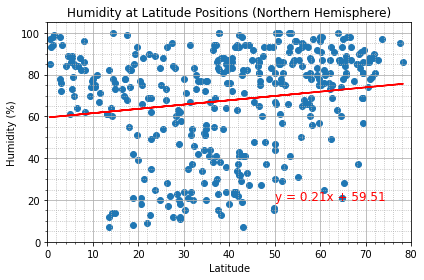

In [33]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

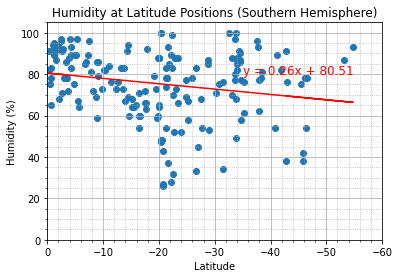

In [34]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

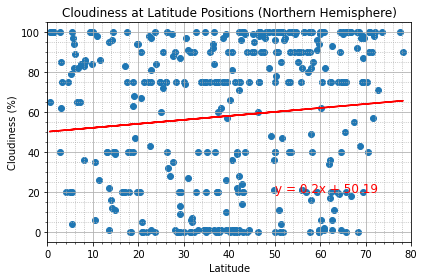

In [35]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

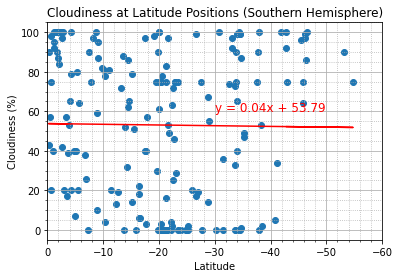

In [36]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

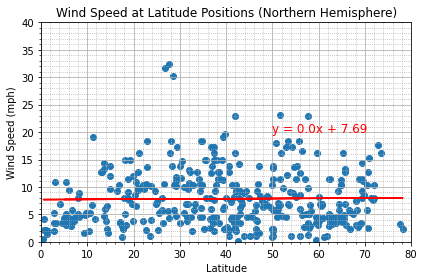

In [37]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

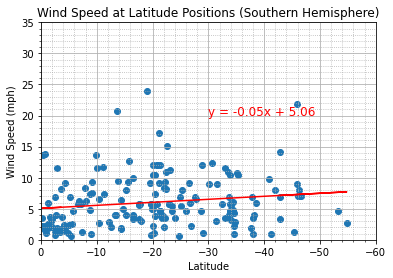

In [38]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()